In [8]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 12s 1us/step


(60000, 28, 28)

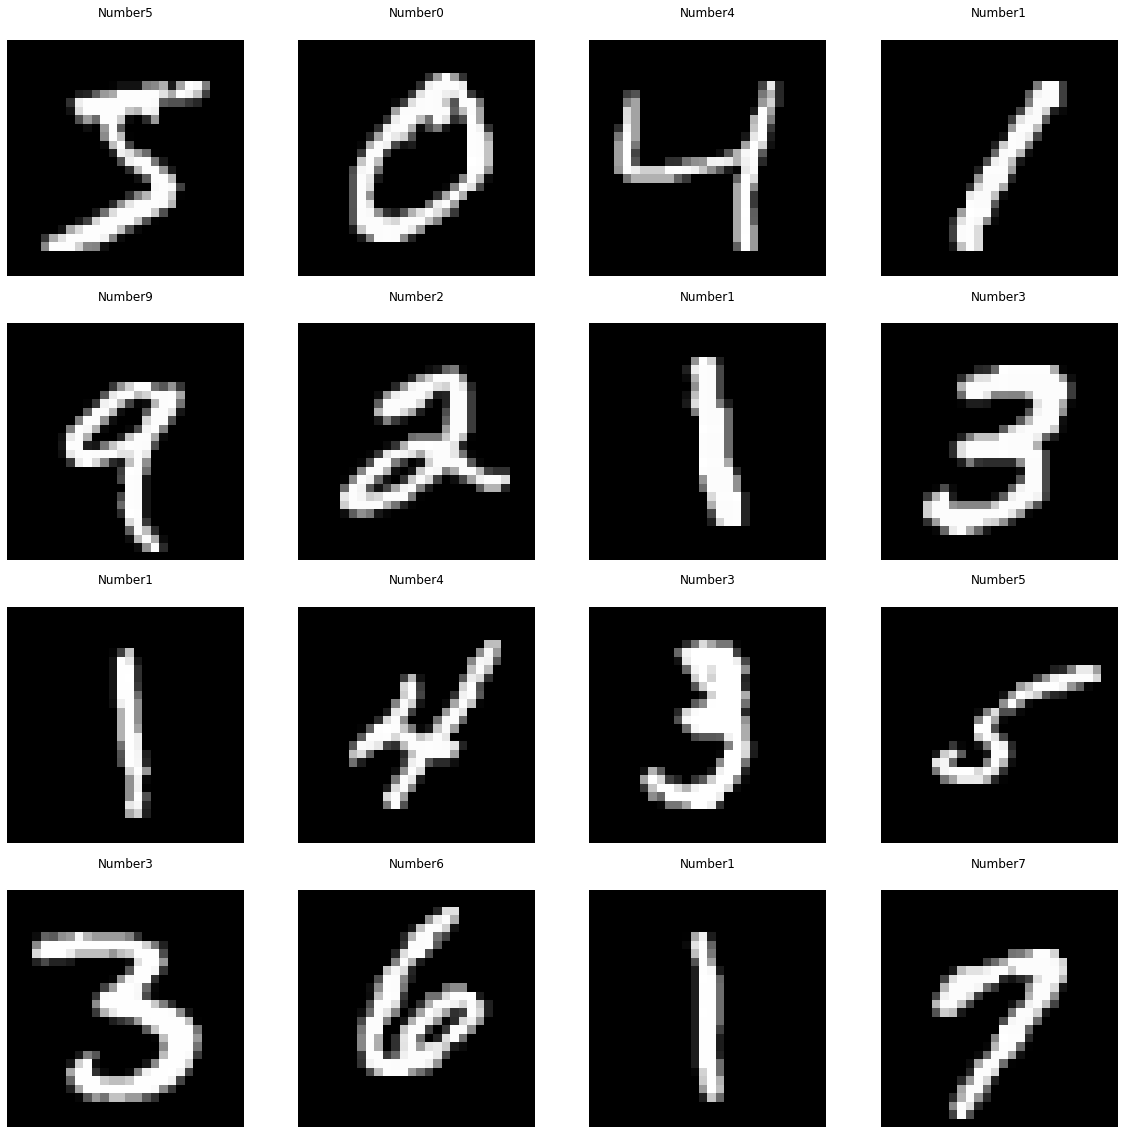

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4,4,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number{}'.format(y_train[i]))

In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape =(28,28,1)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape',x_train.shape)
print('Number of image in x_train',x_train.shape[0])
print('Number of image in x_test',x_test.shape[0])

x_train shape (60000, 28, 28, 1)
Number of image in x_train 60000
Number of image in x_test 10000


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=1)

1875/1875 [==============================] - 33s 17ms/step - loss: 0.5627 - accuracy: 0.8331


In [21]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2224 - accuracy: 0.9331


In [23]:
pred=model.predict(x_test)
pred

313/313 [==============================] - 2s 6ms/step


array([[1.2212403e-05, 5.6648646e-09, 2.0043462e-05, ..., 9.9881846e-01,
        9.7935276e-07, 5.7710364e-04],
       [6.7474297e-04, 8.4390223e-05, 9.9087256e-01, ..., 6.5113390e-09,
        1.1196560e-03, 1.5778802e-08],
       [4.7318404e-06, 9.8957926e-01, 4.3600844e-03, ..., 1.9396447e-03,
        1.4803900e-03, 1.1217818e-04],
       ...,
       [1.6871712e-07, 7.1508985e-08, 4.2477795e-06, ..., 1.7991653e-04,
        6.4782926e-04, 2.0147968e-02],
       [7.8858342e-04, 6.2179577e-04, 9.1228940e-05, ..., 1.3797029e-05,
        1.1849143e-01, 7.7433266e-05],
       [5.2354975e-05, 2.6407893e-08, 2.4108267e-03, ..., 2.2203377e-09,
        5.4662728e-06, 3.5153690e-07]], dtype=float32)

In [24]:
import numpy as np
print(np.argmax(pred[2]))

1


<function matplotlib.pyplot.show(close=None, block=None)>

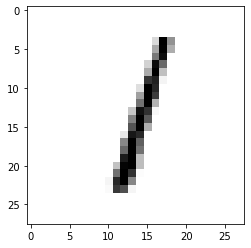

In [25]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show